# Project Title: The Impact of News on the Market
### •	Team Members:
##### 	Rachel Torres, Christian Attard, Jess Alcalde, Nitin Khade
### •	Project Description/Outline:
##### -	We will look at news data and stock data to determine the effects of the news on how the market behaves.
### •	Research Questions to Answer:
##### -	How do news headlines affect the stock market?
##### -	Is there any correlation between certain types of headlines and effects on the market?
##### -	Does negative news affect stocks greater than positive or neutral?
##### -	Can we assign a factor(weighting) to it?

In [1]:
# import dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from news_api import api_key
from x_api import x_api_key

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# Rather than rewriting code multiple times, we've created a function to call the news API and output data into a dataframe
# preliminary work is in older notebook
from news_pull import sentiment_scores
from news_pull import news_pull

### We'll query the news api to gather news headlines from the web

In [2]:
# Create newDF for general market (S&P & Nasdaq)
genNews = news_pull('News')

 There are 27 pages, with 1329 total articles.
  datePublished                                        description  \
0    06/30/2019  Quite a few new laws will be implemented in Ge...   
1    06/28/2019  Watch New movies reviews: Yesterday, Euphoria ...   
2    06/28/2019  Find and research the best new cars, get best ...   
3    06/27/2019  International Business News: "Additional tarif...   
4    06/26/2019  WALLENPAUPACK- Rain clouds past, sunshine retu...   

                                            keywords     provider  \
0   s will take effect july 1,new georgia laws,these  forsythnews   
1                       new movie,yesterday,s videos   globalnews   
2                  car reviews,roadshow,new car,cnet         cnet   
3    on new tariffs,s on china,trump s,s news,donald   indiatimes   
4  new chapter opens,s for wahs,s of 2019,s class...       neagle   

                                               title  \
0     These new Georgia laws will take effect July 1   
1  Ne

In [3]:
# Create newsDF for Wayfair
WayFairNews = news_pull('Wayfair News')

 There are 30 pages, with 1502 total articles.
  datePublished                                        description  \
0    06/27/2019  The protest triggered a broader backlash again...   
1    06/27/2019  Employees at online home furnishings retailer ...   
2    06/26/2019  Wayfair workers walk out to protest U.S. migra...   
3    06/26/2019  Catch up on the most important news from today...   
4    06/26/2019  BOSTON (AP) - Employees at online home furnish...   

                                           keywords      provider  \
0  wayfair workers walk out,lakeland,protest,ledger     theledger   
1            detention center,wayfair,protest,texas          wthr   
2            wayfair workers walk out,one news page   onenewspage   
3   facebook data value,wayfair walkout,boston,news         wired   
4         wayfair employees,detention center,boston  mysanantonio   

                                               title  \
0  Wayfair workers walk out to protest $200,000 s...   
1  Wa

In [4]:
# Create newsDF for Wells Fargo
WellsFargoNews = news_pull('Wells Fargo News')

 There are 45 pages, with 2232 total articles.
  datePublished                                        description  \
0    03/29/2019  Wells Fargo news today about company President...   
1    07/01/2019  Research Analysts updated eps estimates for Mo...   
2    06/27/2019  The Western Albemarle Athletics Department won...   
3    06/24/2019  Be the first to get all the important details ...   
4    06/21/2019  A text scam is making the rounds to Utah consu...   

                                            keywords             provider  \
0           wells fargo news,ceo tim sloan,president        investorplace   
1        updated eps estimates,wells fargo,nyse agco  americanbankingnews   
2  western albemarle,wells fargo cup,department,s...                nbc29   
3            wells fargo center,whp 580,news,2019,pm                whptv   
4  utah consumers,s targeted by,s fargo bank,text...          deseretnews   

                                               title  \
0  Wells Farg

In [5]:
# Create newsDF for Tesla
TeslaNews = news_pull('Tesla News')

 There are 46 pages, with 2312 total articles.
  datePublished                                        description  \
0    06/29/2019  All eyes are on the Model 3 as the new vehicle...   
1    06/25/2019  This Electrek app provides you with articles r...   
2    06/12/2019  TESLA CEO is one step closer to becoming a rea...   
3    05/17/2019  In the latest Tesla news, TSLA stock is sinkin...   
4    02/28/2019  The billionaire has a surprise up his sleeve f...   

                                            keywords       provider  \
0                  can model 3 deliveries,tesla news        ibtimes   
1                 technology,electrek,services,tesla          zdnet   
2                       tesla news,science,james,car        express   
3                              tesla model,autopilot  investorplace   
4  reveal big tesla news,metro news,elon musk,twi...          metro   

                                               title  \
0    Tesla News: Can Model 3 Deliveries Keep Risi

In [6]:
# Create newsDF for Political News
PoliNews = news_pull('Political News')

 There are 39 pages, with 1932 total articles.
  datePublished                                        description  \
0    07/01/2019        Music, Film, TV and Political News Coverage   
1    06/29/2019  Lawmakers seeking to slap gambling-addiction w...   
2    06/28/2019  The Supreme Court will decide whether Presiden...   
3    06/24/2019  Saturday night, WJTV launched it's new weekly ...   
4    06/20/2019  Political News Sites Create Ad Network To Comp...   

                                            keywords           provider  \
0                    rolling stone,political,film,tv       rollingstone   
1   lottery tickets,political news,warnings,desantis  sunshinestatenews   
2              president donald trump,political news               wthr   
3  new weekly political program,mississippi polit...       yallpolitics   
4  political news sites create ad network to comp...          mediapost   

                                               title  \
0  Watch This Clip From T

In [7]:
# Create newsDF for Financial News
FinNews = news_pull('Financial News')

 There are 29 pages, with 1445 total articles.
  datePublished                                        description  \
0    07/01/2019  A large amount of Americans are curbing their ...   
1    06/29/2019  MarketWatch provides the latest stock market, ...   
2    06/29/2019  Watch ET Now (ETNow) Business Financial News C...   
3    06/20/2019  THE BUSINESS TIMES - Find latest business & fi...   
4    06/19/2019  How is financial news like a crying baby? Robe...   

                                            keywords       provider  \
0                financial news,business,quotes,data           cnbc   
1       stock market news,financial news,marketwatch    marketwatch   
2  live et now business financial news channel st...     indiatimes   
3         business times,financial news,videos,house  businesstimes   
4  cfa institute enterprising investor,financial ...   cfainstitute   

                                               title  \
0  Americans are cutting back on their spending, 

In [8]:
import pandas as pd

In [9]:
# import stock data
nasdaq_data = "nasdaq.csv"
nasdaq_df = pd.read_csv(nasdaq_data)


sp500_data = "sp500.csv"
sp500_df = pd.read_csv(sp500_data)
sp500_df.head()

# Load stock data into notebook as dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2018,2727.129883,2743.260010,2718.030029,2718.370117,2718.370117,3565620000
1,7/2/2018,2704.949951,2727.260010,2698.949951,2726.709961,2726.709961,3073650000
2,7/3/2018,2733.270020,2736.580078,2711.159912,2713.219971,2713.219971,1911470000
3,7/5/2018,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000
4,7/6/2018,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000


In [10]:
nasdaq_df.insert(0, 'Index', 'Nasdaq')
nasdaq_df.head()

sp500_df.insert(0, 'Index', 'S&P 500')
sp500_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,S&P 500,6/29/2018,2727.129883,2743.260010,2718.030029,2718.370117,2718.370117,3565620000
1,S&P 500,7/2/2018,2704.949951,2727.260010,2698.949951,2726.709961,2726.709961,3073650000
2,S&P 500,7/3/2018,2733.270020,2736.580078,2711.159912,2713.219971,2713.219971,1911470000
3,S&P 500,7/5/2018,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000
4,S&P 500,7/6/2018,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000


In [11]:
# Merge 2 DataFrames
stock_df = pd.concat([sp500_df, nasdaq_df], ignore_index=True)

#sort by date
stock_df = stock_df.sort_values(by=['Date'])
stock_df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
133,S&P 500,1/10/2019,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000
385,Nasdaq,1/10/2019,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000
134,S&P 500,1/11/2019,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000
386,Nasdaq,1/11/2019,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000
387,Nasdaq,1/14/2019,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000
135,S&P 500,1/14/2019,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3664450000
388,Nasdaq,1/15/2019,6931.390137,7025.850098,6928.120117,7023.830078,7023.830078,2038090000
136,S&P 500,1/15/2019,2585.100098,2613.080078,2585.100098,2610.300049,2610.300049,3572330000
389,Nasdaq,1/16/2019,7033.750000,7079.629883,7028.120117,7034.689941,7034.689941,2149580000
137,S&P 500,1/16/2019,2614.750000,2625.760010,2612.679932,2616.100098,2616.100098,3863770000


### About the Scoring (taken from vaderSentiment docs)
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

    positive sentiment: compound score >= 0.05
    neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    negative sentiment: compound score <= -0.05
The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [12]:
stock_df['Delta'] = (stock_df.Open - stock_df.Close)*100/stock_df.Open

In [13]:
stock_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta
133,S&P 500,1/10/2019,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,-0.898768
385,Nasdaq,1/10/2019,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000,-1.120623
134,S&P 500,1/11/2019,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,-0.314898
386,Nasdaq,1/11/2019,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000,-0.345738
387,Nasdaq,1/14/2019,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000,0.030542


In [14]:
genNews.head()

,datePublished,description,keywords,provider,title,url,sentiment_score,sentiment
0,06/30/2019,Quite a few new laws will be implemented in Ge...,"s will take effect july 1,new georgia laws,these",forsythnews,These new Georgia laws will take effect July 1,https://www.forsythnews.com/local/state-govern...,0.4278,positive
1,06/28/2019,"Watch New movies reviews: Yesterday, Euphoria ...","new movie,yesterday,s videos",globalnews,"New movies reviews: Yesterday, Euphoria and An...",https://globalnews.ca/video/5442628/new-movies...,0.6486,positive
2,06/28/2019,"Find and research the best new cars, get best ...","car reviews,roadshow,new car,cnet",cnet,"New cars, car reviews and pricing",http://cnet.com/roadshow/auto,0.8555,positive
3,06/27/2019,"International Business News: ""Additional tarif...","on new tariffs,s on china,trump s,s news,donald",indiatimes,Donald Trump says will decide on new tariffs o...,http://timesofindia.indiatimes.com/world/europ...,0.3094,positive
4,06/26/2019,"WALLENPAUPACK- Rain clouds past, sunshine retu...","new chapter opens,s for wahs,s of 2019,s class...",neagle,New chapter opens for WAHS Class of 2019,https://www.neagle.com/news/20190626/new-chapt...,0.9042,positive


In [15]:
# change data type of sentiment score to numeric
genNews.sentiment_score = pd.to_numeric(genNews.sentiment_score)

# change name of date column to match stock DF
genNews = genNews.rename(columns = {'datePublished':'Date'})


In [16]:
genNewsSummary = genNews.groupby('Date')['sentiment_score'].mean()

In [17]:
genNewsSummary

Date
01/01/2013    0.762700
01/01/2016    0.613950
01/01/2019    0.756800
01/02/2019    0.881800
01/03/2003    0.318200
01/03/2014    0.000000
01/05/2017    0.077200
01/06/2018    0.277550
01/06/2019    0.542067
01/07/2015    0.000000
01/07/2019    0.000000
01/09/2018    0.749700
01/10/2019    0.273200
01/11/2004    0.795850
01/11/2016    0.000000
01/11/2019    0.081800
01/12/2016    0.170000
01/14/2012   -0.612400
01/14/2019    0.276250
01/15/2009    0.895500
01/15/2016   -0.016800
01/15/2018    0.718400
01/15/2019   -0.264000
01/16/2018    0.778300
01/16/2019    0.985300
01/17/2012   -0.670500
01/18/2018    0.585900
01/19/2016    0.000000
01/19/2018    0.924600
01/21/2018   -0.226300
                ...   
12/14/2018    0.862500
12/15/2014    0.542300
12/15/2016    0.250000
12/15/2017    0.612400
12/16/2009    0.526700
12/16/2018    0.612400
12/17/2018    0.734250
12/18/2018    0.092200
12/19/2013    0.000000
12/20/2018    0.502400
12/21/2008    0.718400
12/21/2010   -0.421500
12/21/

In [18]:
# format date column of stock_df
stock_df.Date = pd.to_datetime(stock_df.Date)
stock_df.Date = stock_df.Date.dt.strftime('%m/%d/%Y') 

In [19]:
stock_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta
133,S&P 500,01/10/2019,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,-0.898768
385,Nasdaq,01/10/2019,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000,-1.120623
134,S&P 500,01/11/2019,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,-0.314898
386,Nasdaq,01/11/2019,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000,-0.345738
387,Nasdaq,01/14/2019,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000,0.030542


In [20]:
# Merge 2 dataframes on Date
genNewsCombined = pd.merge(stock_df,genNewsSummary, on = 'Date', how = 'inner')

In [21]:
genNewsCombined

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score
0,S&P 500,01/10/2019,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,-0.898768,0.273200
1,Nasdaq,01/10/2019,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000,-1.120623,0.273200
2,S&P 500,01/11/2019,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,-0.314898,0.081800
3,Nasdaq,01/11/2019,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000,-0.345738,0.081800
4,Nasdaq,01/14/2019,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000,0.030542,0.276250
5,S&P 500,01/14/2019,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3664450000,-0.089138,0.276250
6,Nasdaq,01/15/2019,6931.390137,7025.850098,6928.120117,7023.830078,7023.830078,2038090000,-1.333642,-0.264000
7,S&P 500,01/15/2019,2585.100098,2613.080078,2585.100098,2610.300049,2610.300049,3572330000,-0.974815,-0.264000
8,Nasdaq,01/16/2019,7033.750000,7079.629883,7028.120117,7034.689941,7034.689941,2149580000,-0.013363,0.985300
9,S&P 500,01/16/2019,2614.750000,2625.760010,2612.679932,2616.100098,2616.100098,3863770000,-0.051634,0.985300


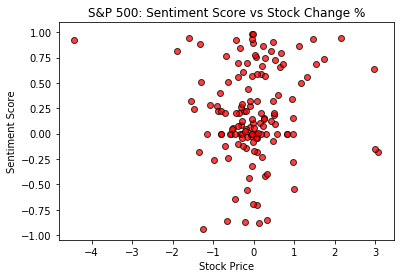

In [22]:
# Use Matplotlib and stats to generate graphs and look for relationships

genNewsCombinedSP = genNewsCombined.loc[(genNewsCombined["Index"] == "S&P 500")]
sentiment_score_SP = genNewsCombinedSP['sentiment_score']
delta_SP = genNewsCombinedSP['Delta']


plt.title("S&P 500: Sentiment Score vs Stock Change %")
plt.xlabel("Stock Price")
plt.ylabel("Sentiment Score")

plt.scatter(delta_SP, sentiment_score_SP , marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.show()


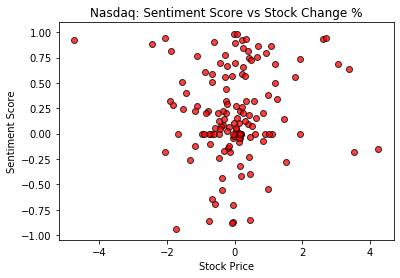

In [23]:
genNewsCombinedNSQ = genNewsCombined.loc[(genNewsCombined["Index"] == "Nasdaq")]
sentiment_score_NSQ = genNewsCombinedNSQ['sentiment_score']
delta_NSQ = genNewsCombinedNSQ['Delta']


plt.title("Nasdaq: Sentiment Score vs Stock Change %")
plt.xlabel("Stock Price")
plt.ylabel("Sentiment Score")

plt.scatter(delta_NSQ, sentiment_score_NSQ , marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)




plt.show()

In [30]:
genNewsCombinedNSQ['Date'] = pd.to_datetime(genNewsCombinedNSQ['Date'])
genNewsCombinedNSQ['month'] = genNewsCombinedNSQ['Date'].dt.to_period('M')
genNewsCombinedNSQ

/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score,month
1,Nasdaq,2019-01-10,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000,-1.120623,0.273200,2019-01
3,Nasdaq,2019-01-11,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000,-0.345738,0.081800,2019-01
4,Nasdaq,2019-01-14,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000,0.030542,0.276250,2019-01
6,Nasdaq,2019-01-15,6931.390137,7025.850098,6928.120117,7023.830078,7023.830078,2038090000,-1.333642,-0.264000,2019-01
8,Nasdaq,2019-01-16,7033.750000,7079.629883,7028.120117,7034.689941,7034.689941,2149580000,-0.013363,0.985300,2019-01
11,Nasdaq,2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000,-2.444014,0.881800,2019-01
12,Nasdaq,2019-01-22,7109.569824,7110.160156,6979.810059,7020.359863,7020.359863,2380950000,1.254787,0.343467,2019-01
15,Nasdaq,2019-01-29,7087.490234,7092.290039,7011.470215,7028.290039,7028.290039,2089690000,0.835277,0.200100,2019-01
17,Nasdaq,2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2507550000,-0.975807,0.000000,2019-01
19,Nasdaq,2018-10-01,8091.500000,8107.379883,8019.770020,8037.299805,8037.299805,2283230000,0.669841,0.750500,2018-10


In [35]:
genNewsCombinedNSQMonth = genNewsCombinedNSQ.groupby('month')["Delta"].mean()
genNewsCombinedNSQ_df = pd.DataFrame(genNewsCombinedNSQMonth)
genNewsCombinedNSQ_df['sentiment_score'] = genNewsCombinedNSQ.groupby('month')['sentiment_score'].mean()
genNewsCombinedNSQ_df


,Delta,sentiment_score
month,,
2018-06,0.448429,-0.401900
2018-07,0.284078,0.389800
2018-08,-0.129551,-0.302417
2018-09,-0.150521,0.335271
2018-10,0.625555,0.286898
2018-11,-0.029154,0.338447
2018-12,0.371929,0.591129
2019-01,-0.456953,0.308657
2019-02,-0.455372,0.230157


In [58]:
genNewsCombinedNSQ_df.reset_index(inplace=True)

In [65]:
plt.plot_date?

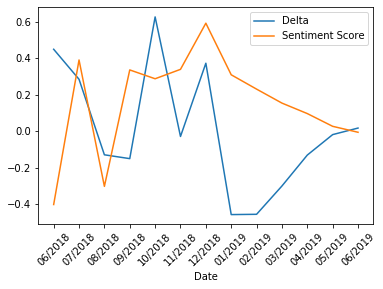

In [88]:
from datetime import datetime

genNewsCombinedNSQ_df.month = pd.to_datetime(genNewsCombinedNSQ_df['month'])
genNewsCombinedNSQ_df.month = genNewsCombinedNSQ_df.month.dt.strftime('%m/%Y')


delta_month_nsq = genNewsCombinedNSQ_df['Delta']
score_month_nsq = genNewsCombinedNSQ_df['sentiment_score']
date = genNewsCombinedNSQ_df['month']

plt.plot(date,delta_month_nsq)
plt.plot(date,score_month_nsq)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.legend(['Delta','Sentiment Score'])
plt.show()

In [56]:
fig, (ax1) = plt.subplots( sharex=True)
fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")


ax1.plot(date, score_month_nsq, linewidth=1, marker="o")

ax1.set_ylabel("Violent Crime Rate")



TypeError: Axis must have `freq` set to convert to Periods

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11b60c158> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units